# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Lazuardi Firdaus
- **Email:** m012d4ky1568@bangkit.academy
- **ID Dicoding:** m012d4ky1568

## Menentukan Pertanyaan Bisnis

- Kapan waktu yang baik untuk sekiranya diperlukan perbaikan alat?
- bagaimana kita bisa mengetahui kapan dan digunakan untuk apakah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [37]:
import numpy as np  # Mengimpor NumPy, library yang digunakan untuk manipulasi data numerik, seperti array dan operasi matematika.
import pandas as pd  # Mengimpor pandas, library yang digunakan untuk manipulasi dan analisis data, terutama dalam bentuk DataFrame.
import matplotlib.pyplot as plt  # Mengimpor Matplotlib, library untuk visualisasi data, terutama untuk membuat grafik dan plot.



Melakukan import library yang nanti akan digunakan selama analisis data

## Data Wrangling

Merupakan proses untuk melakukan pengumpulan, penilaian, dan pembersihan data

### Gathering Data

In [38]:
dh = pd.read_csv("hour.csv", delimiter=",") #Merupakan fungsi untuk membaca file dataset
dh.head() #Menampilkan 5 data teratas dari dataset

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [39]:
dh.tail() #Menampilkan 5 data terakhir dari dataset

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


Data yang didapatkan berjumlah 17.378 data, dengan 17 fitur ataupun variabel

### Assessing Data

In [40]:
dh.isnull().sum() #Melakukan cek apakah terdapat missing value

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Merupakan indikasi bahwa tidak ada missing value dalam data

In [41]:
dh.duplicated().sum() #Melakukan cek apakah terdapat data yang duplikat

0

Merupakan indikasi bahwa tidak ada data yang duplikat

In [42]:
# Melakukan cek apakah terdapat outlier pada data

Q1 = dh.quantile(0.25) # Menghitung kuartil pertama (Q1)
Q3 = dh.quantile(0.75) # Menghitung kuartil ketiga (Q3)


IQR = Q3 - Q1 # Menghitung IQR (Interquartile Range)

lower_bound = Q1 - 1.5 * IQR # Menentukan batas bawah untuk mendeteksi outlier
upper_bound = Q3 + 1.5 * IQR # Menentukan batas atas untuk mendeteksi outlier


outliers = ((dh < lower_bound) | (dh > upper_bound)).any(axis=1) #Cek dilakukan


print(dh[outliers]) # Menampilkan baris data yang mengandung outlier

       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
175        176  2011-01-08       1   0     1  14        0        6   
178        179  2011-01-08       1   0     1  17        0        6   
194        195  2011-01-09       1   0     1   9        0        0   
196        197  2011-01-09       1   0     1  11        0        0   
265        266  2011-01-12       1   0     1  12        0        3   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17327    17328  2012-12-29       1   1    12  20        0        6   
17328    17329  2012-12-29       1   1    12  21        0        6   
17341    17342  2012-12-30       1   1    12  10        0        0   
17343    17344  2012-12-30       1   1    12  12        0        0   
17344    17345  2012-12-30       1   1    12  13        0        0   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
175             0           1  0.20  0.1667  0.32     0.4925      12   
178            

<ipython-input-42-67d26ed05602>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = dh.quantile(0.25) # Menghitung kuartil pertama (Q1)
<ipython-input-42-67d26ed05602>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = dh.quantile(0.75) # Menghitung kuartil ketiga (Q3)
<ipython-input-42-67d26ed05602>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((dh < lower_bound) | (dh > upper_bound)).any(axis=1) #Cek dilakukan


Dari sini kita dapat mengetahui jika dataset ini terdapat 2.580 data yang bersifat outliers

### Cleaning Data

Melakukan tahap pembersihan data jika data memiliki beberapa data yang harus dibersihkan, bisa berupa missing value, duplikat, outlier, dll. Di dataset ini, kita mendapatkan data yang terdapat outlier yang cukup banyak.

In [43]:
dh = dh[~outliers] #Membuang semua data yang bersifat outlier

Disini kita melakukan drop pada data dengan cara menghapus outliernya.

In [44]:
print(dh[outliers]) #Melihat kembali apakah outliernya masih ada

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


<ipython-input-44-0b500d08d133>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(dh[outliers]) #Melihat kembali apakah outliernya masih ada


DataFrame untuk outlier sudah kosong, artinya data sudah tidak memiliki outlier.

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis atau dikenal dengan EDA merupakan tahap eksplorasi data yang telah dibersihkan guna memperoleh insight dan menjawab pertanyaan analisis.

### Explore ...

In [45]:
dh.describe() #Menampikan parameter statistik dari dataset

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,14799.0,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000
mean,8429.853639,2.489898,0.474965,6.511318,11.165890,0.0,3.024191,0.734847,1.444354,0.483410,0.464407,0.644950,0.180161,23.769647,125.060342,148.829989
std,5021.788339,1.119989,0.499390,3.496449,7.152273,0.0,1.953634,0.441430,0.647801,0.190873,0.170517,0.188672,0.111812,26.523112,113.946827,131.380486
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4096.500000,1.000000,0.000000,3.000000,5.000000,0.0,1.000000,0.000000,1.000000,0.320000,0.318200,0.500000,0.104500,3.000000,28.000000,33.000000
50%,8245.000000,2.000000,0.000000,7.000000,11.000000,0.0,3.000000,1.000000,1.000000,0.480000,0.469700,0.650000,0.164200,13.000000,100.000000,120.000000
75%,12743.500000,3.000000,1.000000,10.000000,18.000000,0.0,5.000000,1.000000,2.000000,0.640000,0.606100,0.810000,0.253700,37.000000,186.000000,229.000000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,0.0,6.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.462700,114.000000,499.000000,594.000000


ini dilakukan untuk melihat rangkuman parameter statistik dari setiap fitur(mean, median, dll.)

array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>, <Axes: title={'center': 'mnth'}>],
       [<Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weathersit'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>]], dtype=object)

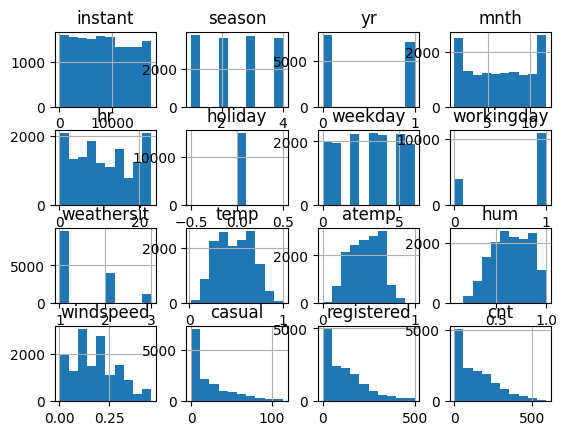

In [46]:
dh.hist() #hist digunakan untuk membuat plot histogram dari kolom numerik pada sebuah Dataset.

Method ini dapat digunakan untuk memeriksa distribusi data secara cepat.

In [47]:
dh.groupby(by="hr").mean().round(2) #Pengelompokan data berdasarkan rata-rata tiap jam

<ipython-input-47-492dcdd37a81>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dh.groupby(by="hr").mean().round(2) #Pengelompokan data berdasarkan rata-rata tiap jam


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
hr,,,,,,,,,,,,,,,
0,8666.37,2.51,0.50,6.54,0.0,3.03,0.70,1.40,0.47,0.45,0.69,0.16,10.07,43.90,53.97
1,8666.67,2.51,0.50,6.53,0.0,3.03,0.70,1.39,0.46,0.45,0.71,0.15,6.48,26.94,33.42
2,8742.52,2.53,0.51,6.58,0.0,3.07,0.70,1.41,0.46,0.44,0.72,0.15,4.71,18.16,22.87
3,8852.93,2.55,0.51,6.69,0.0,3.07,0.69,1.43,0.45,0.44,0.73,0.15,2.72,9.07,11.79
4,8925.74,2.57,0.52,6.70,0.0,3.06,0.69,1.43,0.45,0.44,0.75,0.15,1.25,5.18,6.43
5,8753.96,2.52,0.51,6.60,0.0,3.05,0.71,1.42,0.44,0.42,0.75,0.15,1.41,18.78,20.19
6,8659.90,2.51,0.50,6.52,0.0,3.04,0.70,1.45,0.43,0.42,0.75,0.15,4.19,73.35,77.55
7,8474.87,2.48,0.48,6.47,0.0,3.04,0.69,1.50,0.44,0.42,0.73,0.17,10.89,194.57,205.46
8,6874.39,2.40,0.31,6.31,0.0,2.99,0.59,1.50,0.44,0.42,0.71,0.18,19.08,230.66,249.73


## Visualization & Explanatory Analysis

Merupakan tahap visualisasi dari data yang akan kita tunjukkan

### Pertanyaan 1:Kapan waktu yang baik untuk sekiranya diperlukan perbaikan alat?

Untuk menjawab pertanyaan tersebut, kita perlu membandingkan jumlah peminjaman sepeda pada tiap jamnya dan menggunakan plot bar untuk memvisualisasikan hasilnya

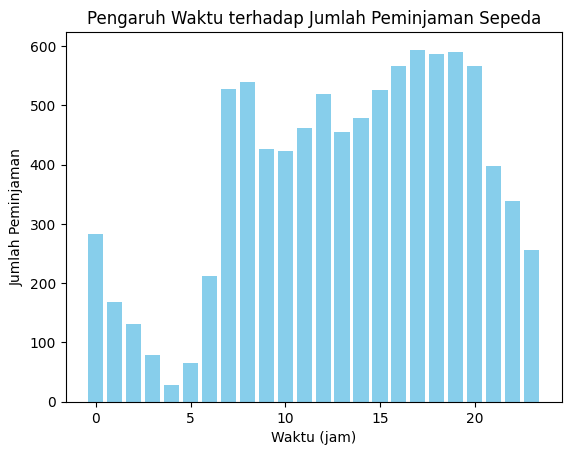

In [48]:
jam = dh['hr']   # Mengambil kolom 'hr' dari DataFrame dh dan menyimpannya ke dalam variabel jam, yang akan digunakan sebagai sumbu x dalam plot.
jumlah = dh['cnt']  # Mengambil kolom 'cnt' dari DataFrame dh dan menyimpannya ke dalam variabel jumlah, yang akan digunakan sebagai sumbu y dalam plot.

plt.bar(jam, jumlah, color='skyblue')  # Membuat plot jenis bar chart dengan menggunakan data dari variabel jam sebagai sumbu x dan data dari variabel jumlah sebagai sumbu y.

plt.title('Pengaruh Waktu terhadap Jumlah Peminjaman Sepeda')  # Menambahkan judul plot untuk memberikan konteks tentang apa yang sedang ditampilkan.
plt.xlabel('Waktu (jam)')  # Menambahkan label sumbu x untuk menjelaskan apa yang diwakilkan oleh sumbu x, dalam hal ini waktu dalam jam.
plt.ylabel('Jumlah Peminjaman')  # Menambahkan label sumbu y untuk menjelaskan apa yang diwakilkan oleh sumbu y, dalam hal ini jumlah peminjaman sepeda.

plt.show()  # Menampilkan plot yang telah dibuat.


Gambar diatas merupakan tampilan dari bagaimana persebaran jumlah peminjaman sepeda pada tiap jamnya.

### Pertanyaan 2:Bagaimana kita bisa mengetahui kapan dan digunakan untuk apakah peminjaman sepeda?

Untuk mengetahui jawaban tersebut, kita akan membandingkan jumlah peminjaman sepeda tiap harinya dalam satu minggu, dan menggunakan plot bar untuk memvisualisasikan hasilnya.

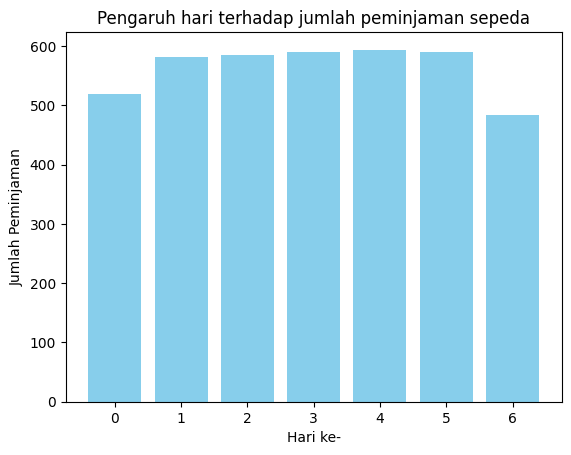

In [49]:
hari = dh['weekday']  # Mengambil kolom 'weekday' dari DataFrame dh dan menyimpannya ke dalam variabel hari, yang akan digunakan sebagai sumbu x dalam plot.

plt.bar(hari, jumlah, color='skyblue')  # Membuat plot jenis bar chart dengan menggunakan data dari variabel hari sebagai sumbu x dan data dari variabel jumlah sebagai sumbu y.

plt.title('Pengaruh hari terhadap jumlah peminjaman sepeda')  # Menambahkan judul plot untuk memberikan konteks tentang apa yang sedang ditampilkan.
plt.xlabel('Hari ke-')  # Menambahkan label sumbu x untuk menjelaskan apa yang diwakilkan oleh sumbu x, dalam hal ini hari.
plt.ylabel('Jumlah Peminjaman')  # Menambahkan label sumbu y untuk menjelaskan apa yang diwakilkan oleh sumbu y, dalam hal ini jumlah.

plt.show()  # Menampilkan plot yang telah dibuat.


Gambar diatas merupakan sebaran jumlah peminjaman dalam hari.

## Conclusion

Kesimpulan dari pertanyaan awal yang jawabannya didapatkan setelah analisis data dilakukan.

- Conclution pertanyaan 1 :Kapan waktu yang baik untuk sekiranya diperlukan perbaikan alat?

Dari hasis analisis data yang bisa dilihat dari gambar diatas, terdapat waktu dengan jumlah peminjaman yang cukup rendah pada rentang pukul 23.00-07.00. Dimana jumlah peminjaman dibawah 300, dan itu bisa dimanfaatkan sebagai waktu untuk perbaikan sepeda jika diperlukan. Karena dengan peminjaman sepeda yang sedikit artinya potensi terganggunya sistem peminjaman ketika ada unit yang perlu diperbaiki lebih minim.

- Conclution pertanyaan 2 : Bagaimana kita bisa mengetahui kapan dan digunakan untuk apakah peminjaman sepeda?

Dari gambar diatas bisa dilihat bahwa pada hari ke-0 dan hari ke-6  atau hari weekend peminjaman sepeda lebih sedikit dari hari lainnya, ini sapat mengindikasikan jika biasanya peminjaman sepeda digunakan sebagai transportasi untuk kegiatan sehari-hari, seperti berangkat ke kantor ataupun sekolah, dibanding dengan hari weekend yang biasanya digunakan masyarakat untuk berlibur.

#Membuat Dashboard

In [50]:
pip install streamlit #instalasi library streamlit

In [51]:
#Membuat file app.py untuk dashboard
%%writefile app.py


Overwriting app.py


- Membuat koneksi dengan localhost untuk menjalankan dashboard

In [52]:
! wget -q -O - ipv4.icanhazip.com

35.236.246.171


In [53]:
! streamlit run app.py & npx localtunnel --port 8501

[..................] \ fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.236.246.171:8501

npx: installed 22 in 2.996s
your url is: https://strong-moments-hunt.loca.lt
  Stopping...
^C


In [56]:
dh.to_csv("all_data.csv", index=False) #Untuk mendownload data yang sudah dibersihkan.